# ML using Decision Trees 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

0.22.0


## First Step: Load Data and disassemble for our purposes

In [4]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [5]:
y=df['group']

In [6]:
df.drop('group', axis='columns', inplace=True)

In [7]:
X = df.as_matrix()

In [8]:
df.describe()

,max speed,age,thousand km per year
count,1500.000000,1500.000000,1500.000000
mean,171.386000,44.969333,30.511333
std,19.269126,16.935040,15.112317
min,118.000000,18.000000,5.000000
25%,158.000000,32.000000,18.000000
50%,170.000000,42.000000,29.000000
75%,187.000000,55.000000,42.000000
max,216.000000,90.000000,84.000000


## Second Step: Decision Trees

In [9]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [13]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

## Fourth Step: Ensemble Methods
* Decision Trees have the tendency to overfit
* Ensemble Methods train a number of Decision Trees and combine their output to reduce overfitting

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

def random_forest_gridsearch():
    param_grid = {
        'n_estimators': list(range(5,11)),
        'max_depth': list(range(5, 16)),
        'min_samples_split': list(range(10, 21)),
        'min_samples_leaf': list(range(5, 16))
        }
    return GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)

def random_forest_randomsearch(n_iter_user=50):
    param_dist = {
        'n_estimators': randint(3,20),
         'max_depth': randint(3, 20),
         'min_samples_split': randint(10, 30),
         'min_samples_leaf': randint(3, 30)
        }
    return RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=n_iter_user, n_jobs=-1)

In [15]:
# clf = random_forest_randomsearch(1000)
clf = RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=12, n_estimators=10)
# -> 77,6% precision on training data, 71,6% recall on new data
%time clf.fit(X_train_2_dim, y_train)
#print(clf.best_params_)

Wall time: 16 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#plot_dt(clf)

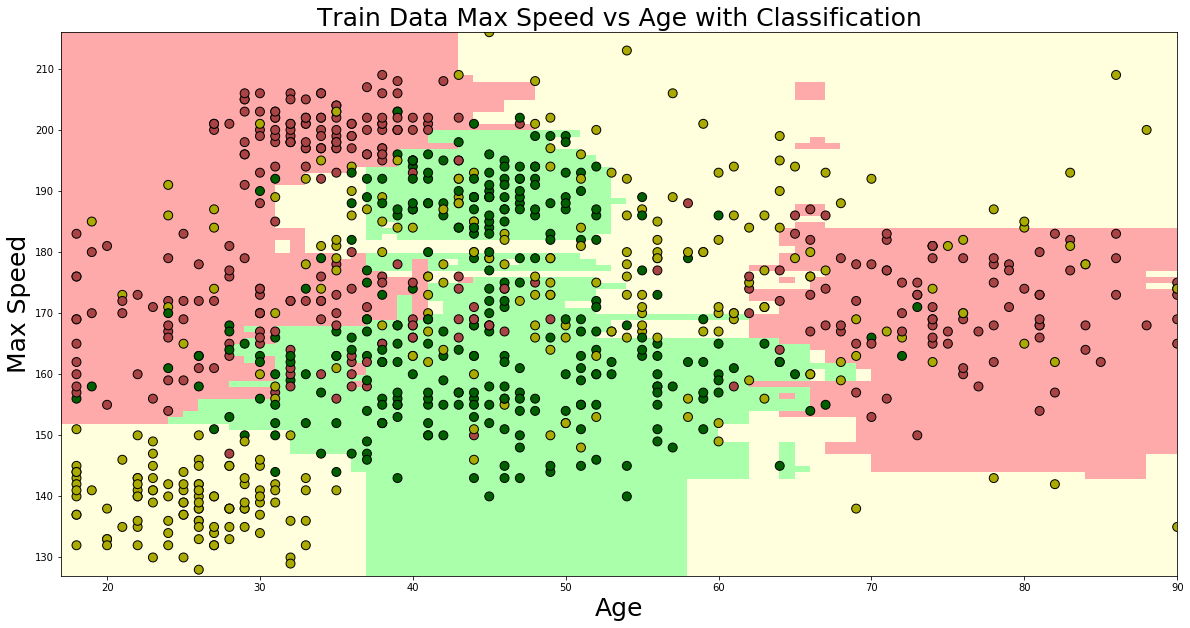

In [17]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [18]:
clf.score(X_train_2_dim, y_train)

0.7744444444444445

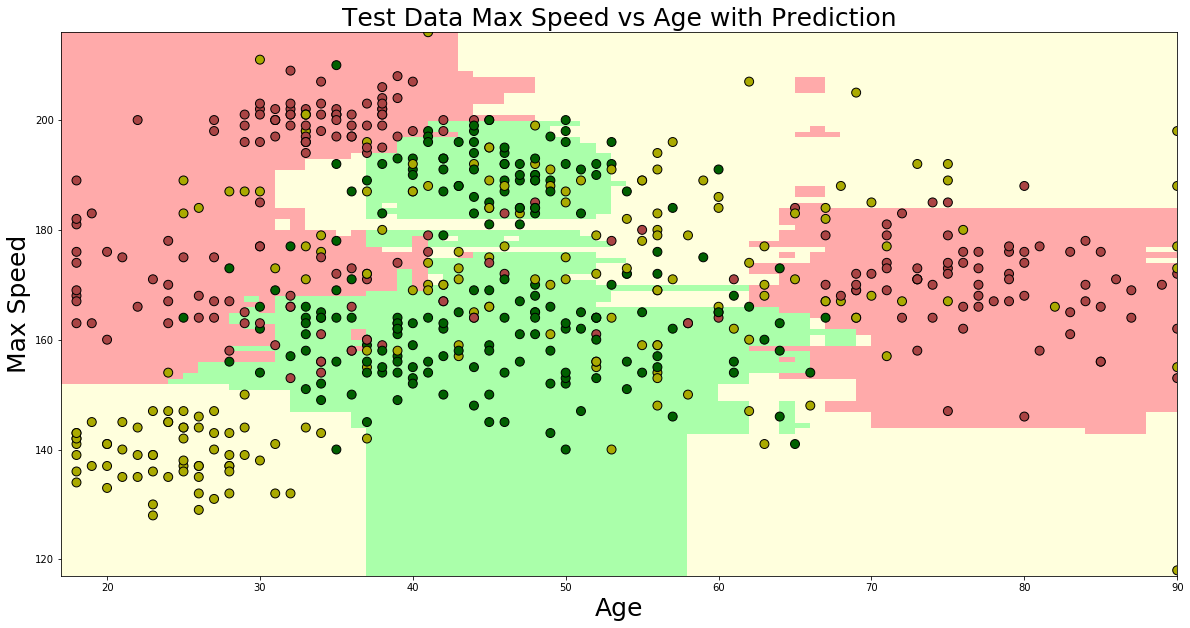

In [19]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [20]:
clf.score(X_test_2_dim, y_test)

0.7166666666666667

### AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier?

### Support Vector Machines

In [22]:
from matplotlib.mlab import frange
from sklearn.svm import SVC

def svc_gridsearch():
    param_grid = {
        'C': list(frange(0.1, 2, 0.1)),
        'gamma': list(frange(0.001, 0.1, 0.0005)),
        'cache_size': [1000]
        }
    return GridSearchCV(SVC(), param_grid, n_jobs=-1)

def svc_randomsearch(n_iter_user=50):
    param_dist = {
        'C': list(frange(0.01, 2, 0.01)),
        'gamma': list(frange(0.001, 0.1, 0.0005)),
        'cache_size': [1000]
        }
    return RandomizedSearchCV(SVC(), param_dist, n_iter=n_iter_user, n_jobs=-1)

In [23]:
# clf = svc_gridsearch()
clf = svc_randomsearch(1000)
#clf = SVC(C=0.5, gamma=1, kernel='linear', cache_size=1000)
# clf = SVC(gamma=0.5, kernel='poly', degree=3, cache_size=1000)
%time clf.fit(X_train_2_dim, y_train)
print(clf.best_params_)

Wall time: 26.8 s
{'gamma': 0.006, 'cache_size': 1000, 'C': 0.59}


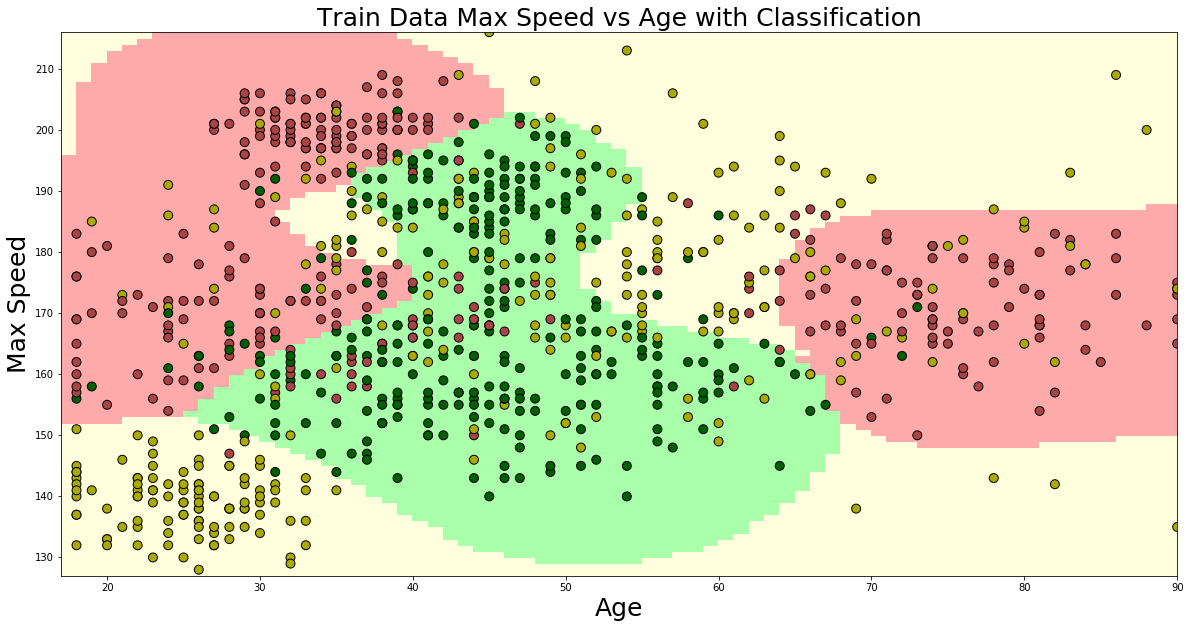

In [24]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [25]:
clf.score(X_train_2_dim, y_train)

0.7455555555555555

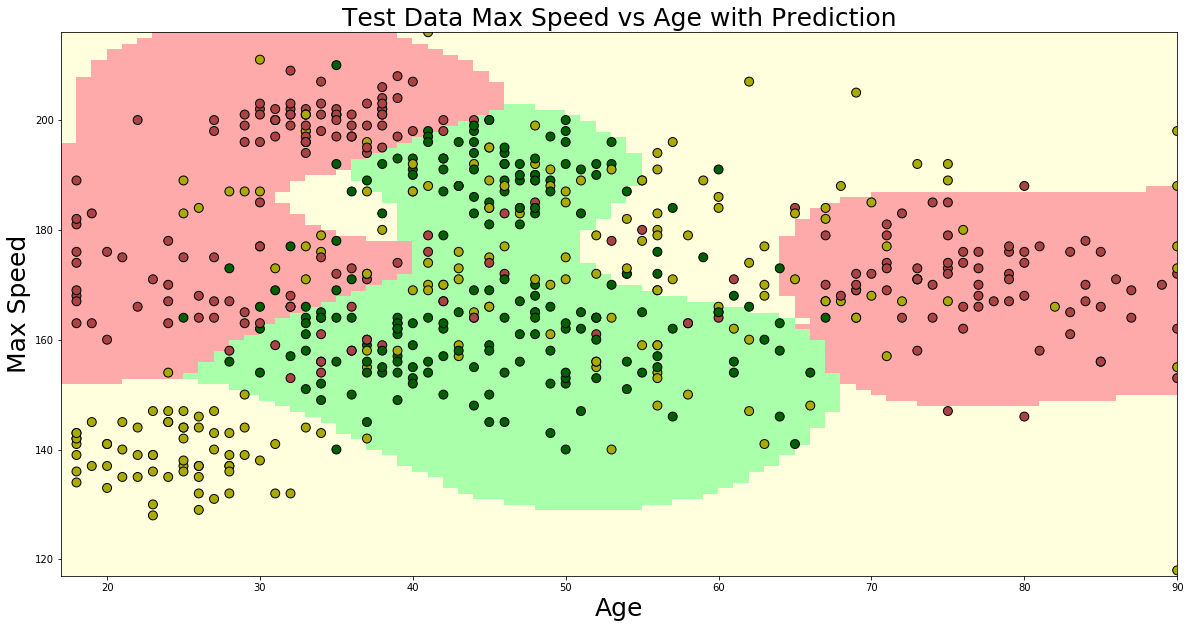

In [26]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [27]:
clf.score(X_test_2_dim, y_test)

0.73

### Quellen
* <https://www.kdnuggets.com/2017/02/yhat-support-vector-machine.html>
* [SKLearn-Doku über GridSearch & Co.](http://scikit-learn.org/stable/modules/grid_search.html)
* [SKLearn-Doku über SVCs](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* <https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/>
* <http://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/>
* <https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions>

### @Prüfungsleistung
* gleicher Datensatz - SVC vs. Neuronales Netz
* PCA
* class weight - wir wollen die schlimmen Finger auf jeden Fall erkennen